In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import SXdgGate
from qiskit.tools.monitor import job_monitor
from matplotlib import style
style.use("dark_background")

CREATING GATES

In [3]:
#ZPLG gate
qc = QuantumCircuit(5)
qc.cx(1, 4)
qc.cx(3, 0)
qc.csx(0, 3)
qc.csx(1, 3)
qc.cx(0, 1)
qc.csx(2, 3)
qc.cx(1, 2)

csxdg_gate = SXdgGate().control()
qc.append(csxdg_gate, [2, 3])

qc.cx(3, 4)
zplg_gate = qc.to_gate()


#doublefeynman gate
qcf = QuantumCircuit(3)
qcf.cx(0, 2)
qcf.cx(0, 1)
f2g_gate = qcf.to_gate()

#uppg gate
uppg_circuit = QuantumCircuit(4)
uppg_circuit.cx(3, 1)
uppg_circuit.cx(1, 0)
uppg_circuit.cx(0, 1)
uppg_circuit.ccx(3, 2, 1)
uppg_circuit.cx(1, 2)
uppg_circuit.cx(3, 2)
uppg_gate = uppg_circuit.to_gate()



In [4]:
#the AU part
au = QuantumCircuit(8)
au.cswap(0, 1, 2)
au.cswap(3, 4, 5)
au.append(zplg_gate, [6, 4, 1, 7, 3])
au_gate = au.to_gate()
print(au_gate)
# au_test = QuantumCircuit(8)
# au_test.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])
# au_test.decompose().draw('mpl')

#the LU part
lu = QuantumCircuit(5)
lu.append(uppg_gate, [0, 1, 2, 3])
lu.cswap(4, 0 , 1)
lu_gate = lu.to_gate()
print(lu_gate)

METHOD 1 - IMPLEMENTING THE ALU CIRCUIT

In [5]:
##adding pre defined gates
def ALUpre(S0, S1,S2, S3, S4, S5, Cin, A, B):
    qc = QuantumCircuit(15, 2)
    
    #conditions
    if(A == '1'):
        qc.x(0)
        qc.x(11)
    if(S0 == '1'):
        qc.x(1)
        qc.x(8)
    if(S1== '1'):
        qc.x(2)
        qc.x(12)
    if(Cin == '1'):
        qc.x(6) 
    if(B == '1'):
        qc.x(3)
        qc.x(9)
        qc.x(10)
    if(S2 == '1'):
        qc.x(4)
    if(S3 == '1'):
        qc.x(5)
    if(S4 == '1'):
        qc.x(13)
    if(S5 == '1'):
        qc.x(14)
    qc.barrier()
    
    #adding au circuit
    qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])
    
    #adding lu circuit
    qc.append(lu_gate, [8, 9, 10, 11, 12])

    #adding fredkin gate
    qc.cswap(13, 1, 8)
    qc.cswap(14, 1, 10)
    
    #measurements
    qc.measure(7, 0)
    qc.measure(1, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 S5 Cin A B = s c/b
0  0  0  0  0  0  0  0  0 = 00
0  0  0  0  0  0  0  0  1 = 00
0  0  0  0  0  0  0  1  0 = 00
0  0  0  0  0  0  0  1  1 = 00
0  0  0  0  0  0  1  0  0 = 10
0  0  0  0  0  0  1  0  1 = 10
0  0  0  0  0  0  1  1  0 = 10
0  0  0  0  0  0  1  1  1 = 10
0  0  0  0  0  1  0  0  0 = 00
0  0  0  0  0  1  0  0  1 = 10
0  0  0  0  0  1  0  1  0 = 10
0  0  0  0  0  1  0  1  1 = 10
0  0  0  0  0  1  1  0  0 = 00
0  0  0  0  0  1  1  0  1 = 10
0  0  0  0  0  1  1  1  0 = 10
0  0  0  0  0  1  1  1  1 = 10
----------------------
0  0  0  0  1  0  0  0  0 = 00
0  0  0  0  1  0  0  0  1 = 10
0  0  0  0  1  0  0  1  0 = 10
0  0  0  0  1  0  0  1  1 = 00
0  0  0  0  1  0  1  0  0 = 00
0  0  0  0  1  0  1  0  1 = 10
0  0  0  0  1  0  1  1  0 = 10
0  0  0  0  1  0  1  1  1 = 00
0  0  0  0  1  1  0  0  0 = 00
0  0  0  0  1  1  0  0  1 = 10
0  0  0  0  1  1  0  1  0 = 10
0  0  0  0  1  1  0  1  1 = 10
0  0  0  0  1  1  1  0  0 = 00
0  0  0  0  1  1  1  0  1 = 10
0  0  0  0  1

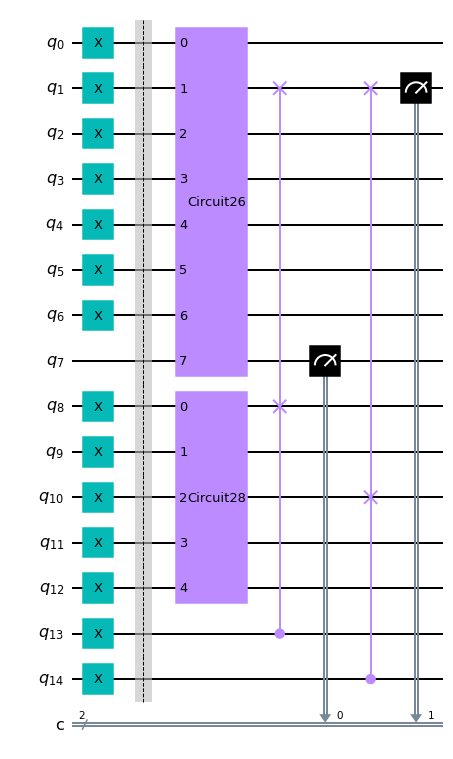

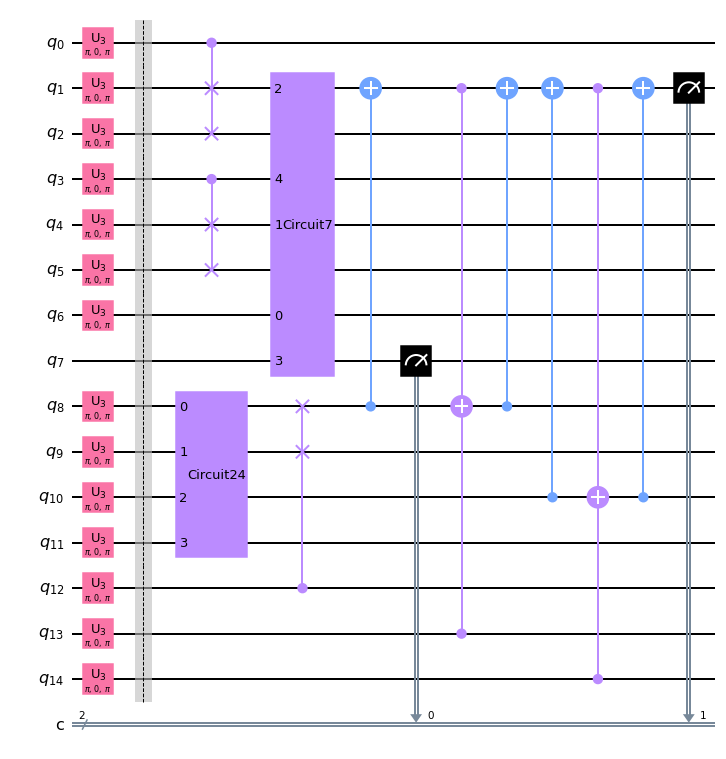

In [6]:
print('{} {} {} {} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'Cin', 'A', 'B'), '=', 's c/b')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for S5 in ['0', '1']:
                        for Cin in ['0', '1']:
                            for A in ['0', '1']:
                                for B in ['0', '1']: 
                                    qc, output = ALUpre(S0, S1, S2, S3, S4, S5, Cin, A, B)
                                    print('{}  {}  {}  {}  {}  {}  {}  {}  {}'.format(S0, S1, S2, S3, S4, S5, Cin, A, B), '=', output)
                    print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

METHOD 2 - IMPLEMENTING THE ALU CIRCUIT

In [13]:
def ALU(S0, S1,S2, S3, S4, S5, Cin):
    qc = QuantumCircuit(11, 2)
    
    #conditions
#     if(A == '1'):
#         qc.x(0)
    if(S0 == '1'):
        qc.x(1)
    if(S1== '1'):
        qc.x(2)
    if(Cin == '1'):
        qc.x(3) 
#     if(B == '1'):
#         qc.x(4)
    if(S2 == '1'):
        qc.x(5)
    if(S3 == '1'):
        qc.x(6)
    if(S4 == '1'):
        qc.x(8)
    if(S5 == '1'):
        qc.x(10)
    qc.barrier()
    
    
    
    #adding the fredkin gate
    qc.cswap(0, 1, 2)
    qc.cswap(4, 5, 6)
    
    #importing the zplg gate
    qc.append(zplg_gate, [3, 5, 1, 7, 4])
    
#     #adding the double feynman gate
#     qc.append(f2g_gate, [8, 3, 4])

   
    
    #LOGIC GATES
    #adding the uppg gate
    qc.append(uppg_gate, [1, 4, 9, 0])
    qc.cswap(2, 1, 4)
    
    #adding the fredkin gate
    qc.cswap(8, 1, 3)
    qc.cswap(10, 1, 3)
    
    #measurements of the carry
    qc.measure(7, 0)
    
    #measuring the output
    qc.measure(3, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 S5 Cin = s c/b
0 0 0 0 0 0 0 = 00
0 0 0 0 0 0 1 = 10
0 0 0 0 0 1 0 = 00
0 0 0 0 0 1 1 = 10
----------------------
0 0 0 0 1 0 0 = 00
0 0 0 0 1 0 1 = 10
0 0 0 0 1 1 0 = 00
0 0 0 0 1 1 1 = 10
----------------------
0 0 0 1 0 0 0 = 00
0 0 0 1 0 0 1 = 10
0 0 0 1 0 1 0 = 00
0 0 0 1 0 1 1 = 10
----------------------
0 0 0 1 1 0 0 = 00
0 0 0 1 1 0 1 = 10
0 0 0 1 1 1 0 = 00
0 0 0 1 1 1 1 = 10
----------------------
0 0 1 0 0 0 0 = 00
0 0 1 0 0 0 1 = 11
0 0 1 0 0 1 0 = 00
0 0 1 0 0 1 1 = 01
----------------------
0 0 1 0 1 0 0 = 00
0 0 1 0 1 0 1 = 01
0 0 1 0 1 1 0 = 00
0 0 1 0 1 1 1 = 11
----------------------
0 0 1 1 0 0 0 = 00
0 0 1 1 0 0 1 = 11
0 0 1 1 0 1 0 = 00
0 0 1 1 0 1 1 = 01
----------------------
0 0 1 1 1 0 0 = 00
0 0 1 1 1 0 1 = 01
0 0 1 1 1 1 0 = 00
0 0 1 1 1 1 1 = 11
----------------------
0 1 0 0 0 0 0 = 00
0 1 0 0 0 0 1 = 10
0 1 0 0 0 1 0 = 00
0 1 0 0 0 1 1 = 10
----------------------
0 1 0 0 1 0 0 = 00
0 1 0 0 1 0 1 = 10
0 1 0 0 1 1 0 = 00
0 1 0 0 1 1 1 = 10
---

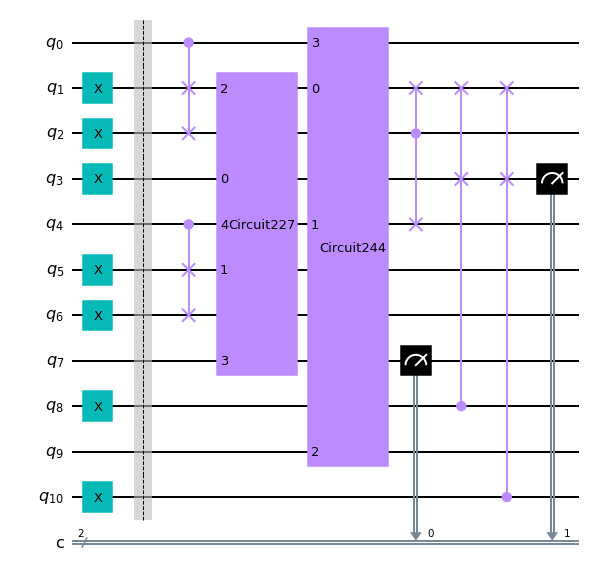

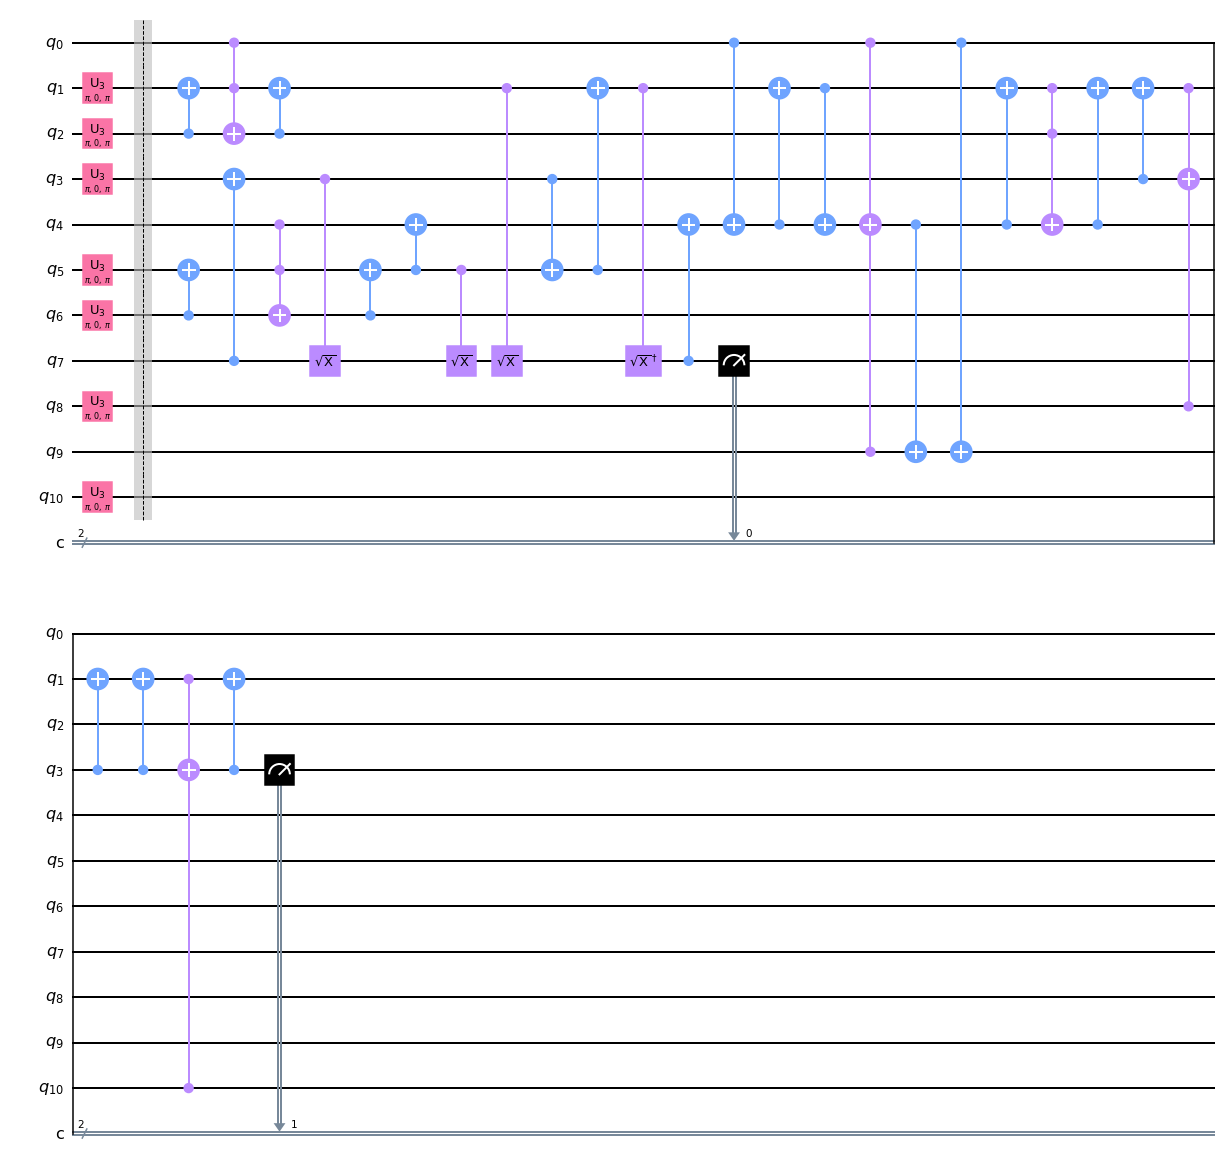

In [14]:
print('{} {} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'Cin'), '=', 's c/b')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for S5 in ['0', '1']:
                        for Cin in ['0', '1']:
                            qc, output = ALU(S0, S1, S2, S3, S4,S5, Cin)
                            print('{} {} {} {} {} {} {}'.format(S0, S1, S2, S3, S4, S5, Cin), '=', output)
                    print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

In [13]:
def ALU1(S0, S1,S2, S3, S4, S5, Cin, A, B):
    qc = QuantumCircuit(11, 2)
    
    #conditions
    if(A == '1'):
        qc.x(0)
    if(S0 == '1'):
        qc.x(1)
    if(S1== '1'):
        qc.x(2)
    if(Cin == '1'):
        qc.x(3) 
    if(B == '1'):
        qc.x(4)
        qc.x(9)
    if(S2 == '1'):
        qc.x(5)
    if(S3 == '1'):
        qc.x(6)
    if(S4 == '1'):
        qc.x(8)
    if(S5 == '1'):
        qc.x(10)
    qc.barrier()
    
    
    
    #adding the fredkin gate
    qc.cswap(0, 1, 2)
    qc.cswap(4, 5, 6)
    
    #importing the zplg gate
    qc.append(zplg_gate, [3, 5, 1, 7, 4])
    
    
    #LOGIC GATES
    #adding the uppg gate
    qc.append(uppg_gate, [1, 4, 9, 0])
    qc.cswap(2, 1, 4)
    
    #adding the fredkin gate
    qc.cswap(8, 1, 3)
    qc.cswap(10, 1, 3)
    
    #measurements of the carry
    qc.measure(7, 0)
    
    #measuring the output
    qc.measure(3, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 S5 Cin A B = s c/b
0  0  0  0  0  0  0  0  0 = 00
0  0  0  0  0  0  0  0  1 = 00
0  0  0  0  0  0  0  1  0 = 00
0  0  0  0  0  0  0  1  1 = 00
0  0  0  0  0  0  1  0  0 = 10
0  0  0  0  0  0  1  0  1 = 10
0  0  0  0  0  0  1  1  0 = 10
0  0  0  0  0  0  1  1  1 = 10
0  0  0  0  0  1  0  0  0 = 00
0  0  0  0  0  1  0  0  1 = 10
0  0  0  0  0  1  0  1  0 = 10
0  0  0  0  0  1  0  1  1 = 00
0  0  0  0  0  1  1  0  0 = 10
0  0  0  0  0  1  1  0  1 = 00
0  0  0  0  0  1  1  1  0 = 00
0  0  0  0  0  1  1  1  1 = 10
----------------------
0  0  0  0  1  0  0  0  0 = 00
0  0  0  0  1  0  0  0  1 = 10
0  0  0  0  1  0  0  1  0 = 10
0  0  0  0  1  0  0  1  1 = 00
0  0  0  0  1  0  1  0  0 = 10
0  0  0  0  1  0  1  0  1 = 00
0  0  0  0  1  0  1  1  0 = 00
0  0  0  0  1  0  1  1  1 = 10
0  0  0  0  1  1  0  0  0 = 00
0  0  0  0  1  1  0  0  1 = 00
0  0  0  0  1  1  0  1  0 = 00
0  0  0  0  1  1  0  1  1 = 00
0  0  0  0  1  1  1  0  0 = 10
0  0  0  0  1  1  1  0  1 = 10
0  0  0  0  1

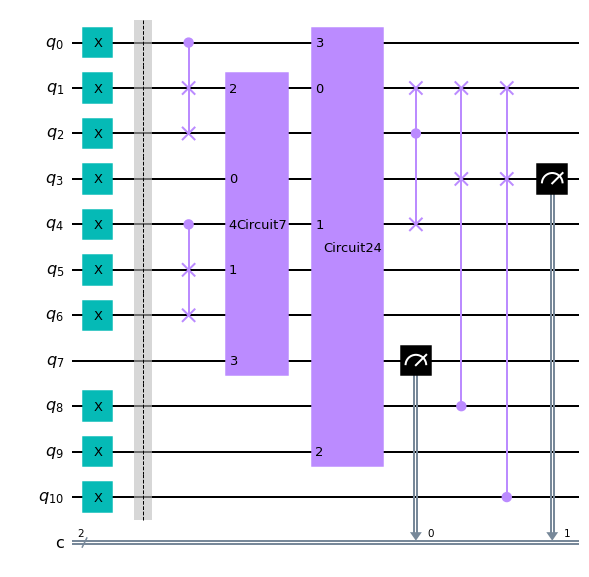

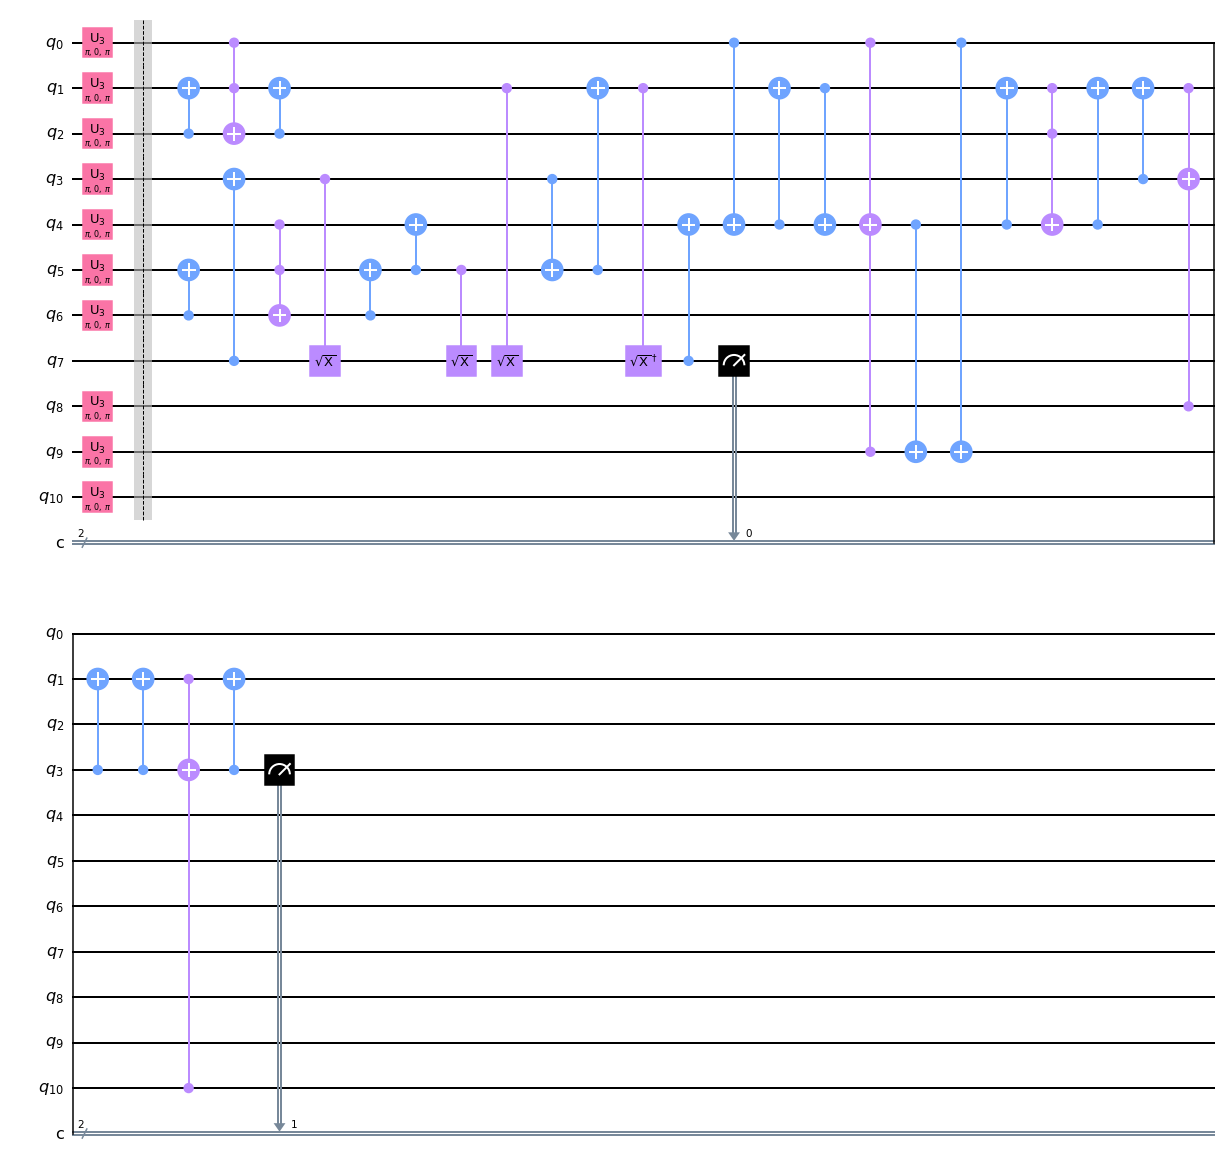

In [14]:
print('{} {} {} {} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'Cin', 'A', 'B'), '=', 's c/b')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for S5 in ['0', '1']:
                        for Cin in ['0', '1']:
                            for A in ['0', '1']:
                                for B in ['0', '1']: 
                                    qc, output = ALU1(S0, S1, S2, S3, S4, S5, Cin, A, B)
                                    print('{}  {}  {}  {}  {}  {}  {}  {}  {}'.format(S0, S1, S2, S3, S4, S5, Cin, A, B), '=', output)
                    print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

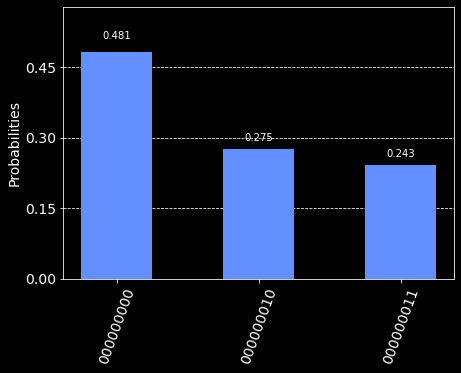

In [33]:
#histogram plot of the AU gate

qc = QuantumCircuit(11, 9)
for i in range(4):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [3, 5, 1, 7, 4])

#LOGIC GATES
#adding the uppg gate
qc.append(uppg_gate, [1, 4, 9, 0])
qc.cswap(2, 1, 4)

#adding the fredkin gate
qc.cswap(8, 1, 3)
qc.cswap(10, 1, 3)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)


job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)

HISTOGRAM PLOTS

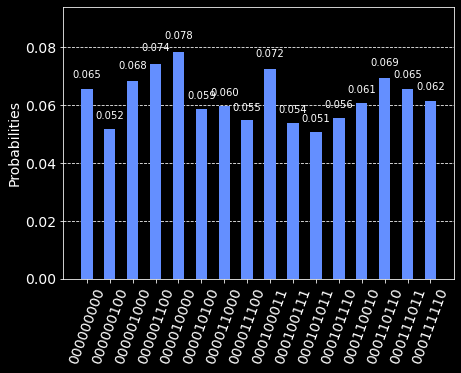

In [19]:
#histogram plot of the AU gate

qc = QuantumCircuit(11, 9)
for i in range(4):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [3, 5, 1, 7, 4])

#LOGIC GATES
#adding the uppg gate
qc.append(uppg_gate, [1, 4, 9, 0])
qc.cswap(2, 1, 4)

#adding the fredkin gate
qc.cswap(8, 1, 3)
qc.cswap(10, 1, 3)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)

qc.measure(1, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)

job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)

IBMQ SIMULATORS

In [16]:
IBMQ.load_account()
IBMQ.providers()
providers = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_santiago has 12 queued and 5 qubits
ibmqx2 has 0 queued and 5 qubits
ibmq_armonk has 44 queued and 1 qubits
simulator_statevector has 2 queued and simulated qubits
ibmq_qasm_simulator has 2 queued and simulated qubits
simulator_mps has 2 queued and simulated qubits
ibmq_bogota has 3 queued and 5 qubits
ibmq_belem has 0 queued and 5 qubits
ibmq_lima has 10 queued and 5 qubits
ibmq_quito has 14 queued and 5 qubits
ibmq_manila has 8 queued and 5 qubits
simulator_extended_stabilizer has 2 queued and simulated qubits
simulator_stabilizer has 2 queued and simulated qubits


Job Status: job has successfully run
None


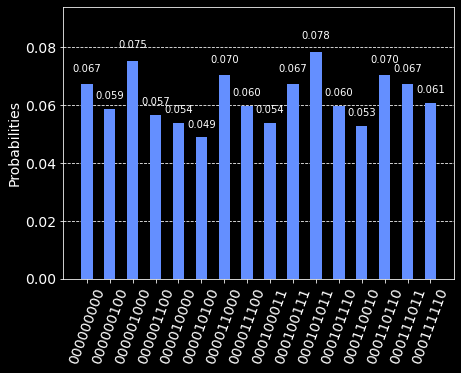

In [20]:
#histogram plot of the ALU gate

qc = QuantumCircuit(11, 9)
for i in range(4):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [3, 5, 1, 7, 4])

#LOGIC GATES
#adding the uppg gate
qc.append(uppg_gate, [1, 4, 9, 0])
qc.cswap(2, 1, 4)

#adding the fredkin gate
qc.cswap(8, 1, 3)
qc.cswap(10, 1, 3)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)

qc.measure(1, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)


backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

Job Status: job has successfully run
None


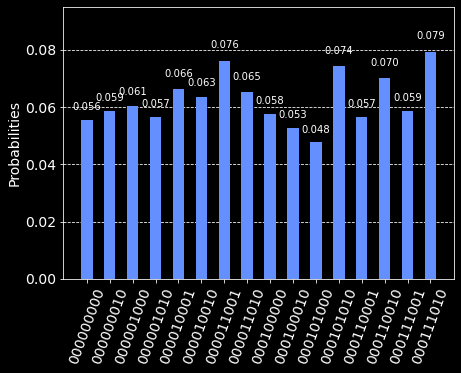

In [23]:
#histogram plot of the ALU gate - method 1

qc = QuantumCircuit(15, 9)
for i in range(6):
    qc.h(i)

#adding au circuit
qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])

#adding lu circuit
qc.append(lu_gate, [8, 9, 10, 11, 12])

#adding fredkin gate
qc.cswap(13, 1, 8)
qc.cswap(14, 1, 10)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(1, 1)

qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)


backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

TESTING THE HISTOGRAM

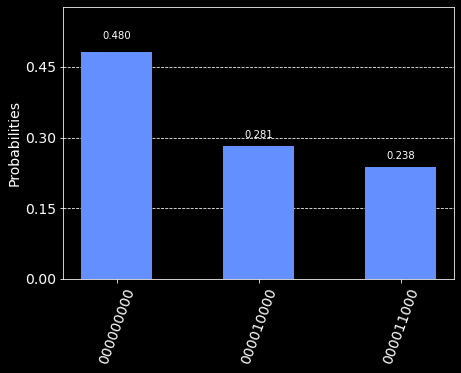

In [10]:
#histogram plot of the AU gate

qc = QuantumCircuit(11, 9)
for i in range(2):
    qc.h(i)

#adding the fredkin gate
qc.cswap(0, 1, 2)
qc.cswap(4, 5, 6)

#importing the zplg gate
qc.append(zplg_gate, [3, 5, 1, 7, 4])

#LOGIC GATES
#adding the uppg gate
qc.append(uppg_gate, [1, 4, 9, 0])
qc.cswap(2, 1, 4)

#adding the fredkin gate
qc.cswap(8, 1, 3)
qc.cswap(10, 1, 3)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(3, 1)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)


job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)